In [1]:
from pycalphad import Database, binplot, equilibrium, calculate
import pycalphad.variables as v

import matplotlib.pyplot as plt
import numpy as np

In [2]:
DB_PATH = 'databases/lab2/CoNi-87Fer-LB.tdb'  # Co-Ni database
db = Database(DB_PATH)

In [3]:
print('Элементы в БД')
db.elements

Элементы в БД


{'CO', 'NI', 'VA'}

In [4]:
print('Фазы в БД')
print(list(db.phases.keys()))

Фазы в БД
['LIQUID', 'FCC_A1', 'BCC_A2', 'HCP_A3']


In [5]:
COMPS = ['CO', 'NI', 'VA']
DB_PHASES = list(db.phases.keys())

### 1.
При помощи функции binplot в pycalphad построить двойную диаграмму состояния. На выбор: Cr-Mo, Si-Ge, Ni-Cu, Ni-Co, Fe-Ni

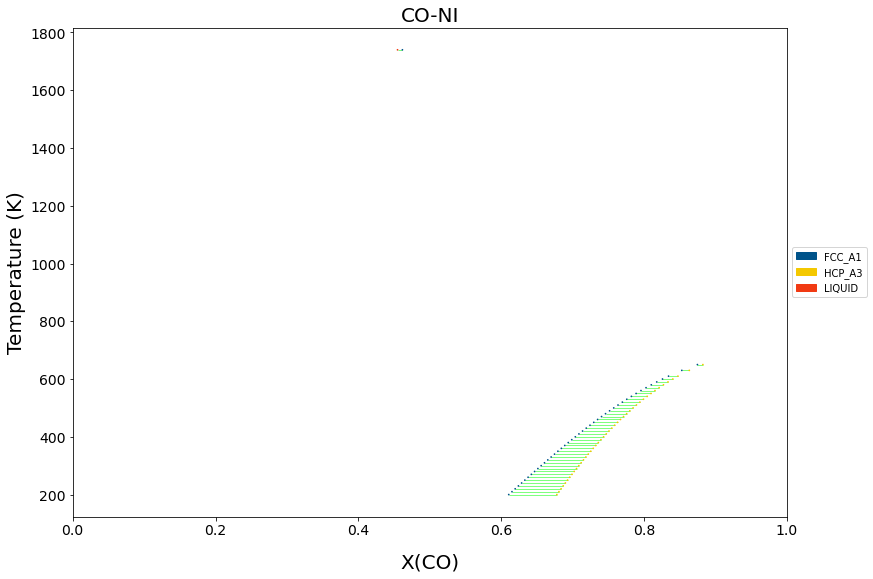

In [6]:
plt.rcParams["figure.figsize"] = [16,9]
binplot(db, ['CO', 'NI', 'VA'] , DB_PHASES, {v.X('CO'): (0, 1, 0.02), v.T: (200, 2000, 10), v.P:101325}, )
plt.show()

## 1.1
Сравнить полученную диаграмму в диаграммой, построенной при помощи ThermoCalc (картинки). В случае если характер фазовых равновесий отличается- уменьшить шаг для концентрации или температуры. Если ничего не помогает- ориентироваться на ThermoCalc

$\textit{Найти фазу LIQUID с помощью уменьшения шага для концентрации и температры не удалось}$

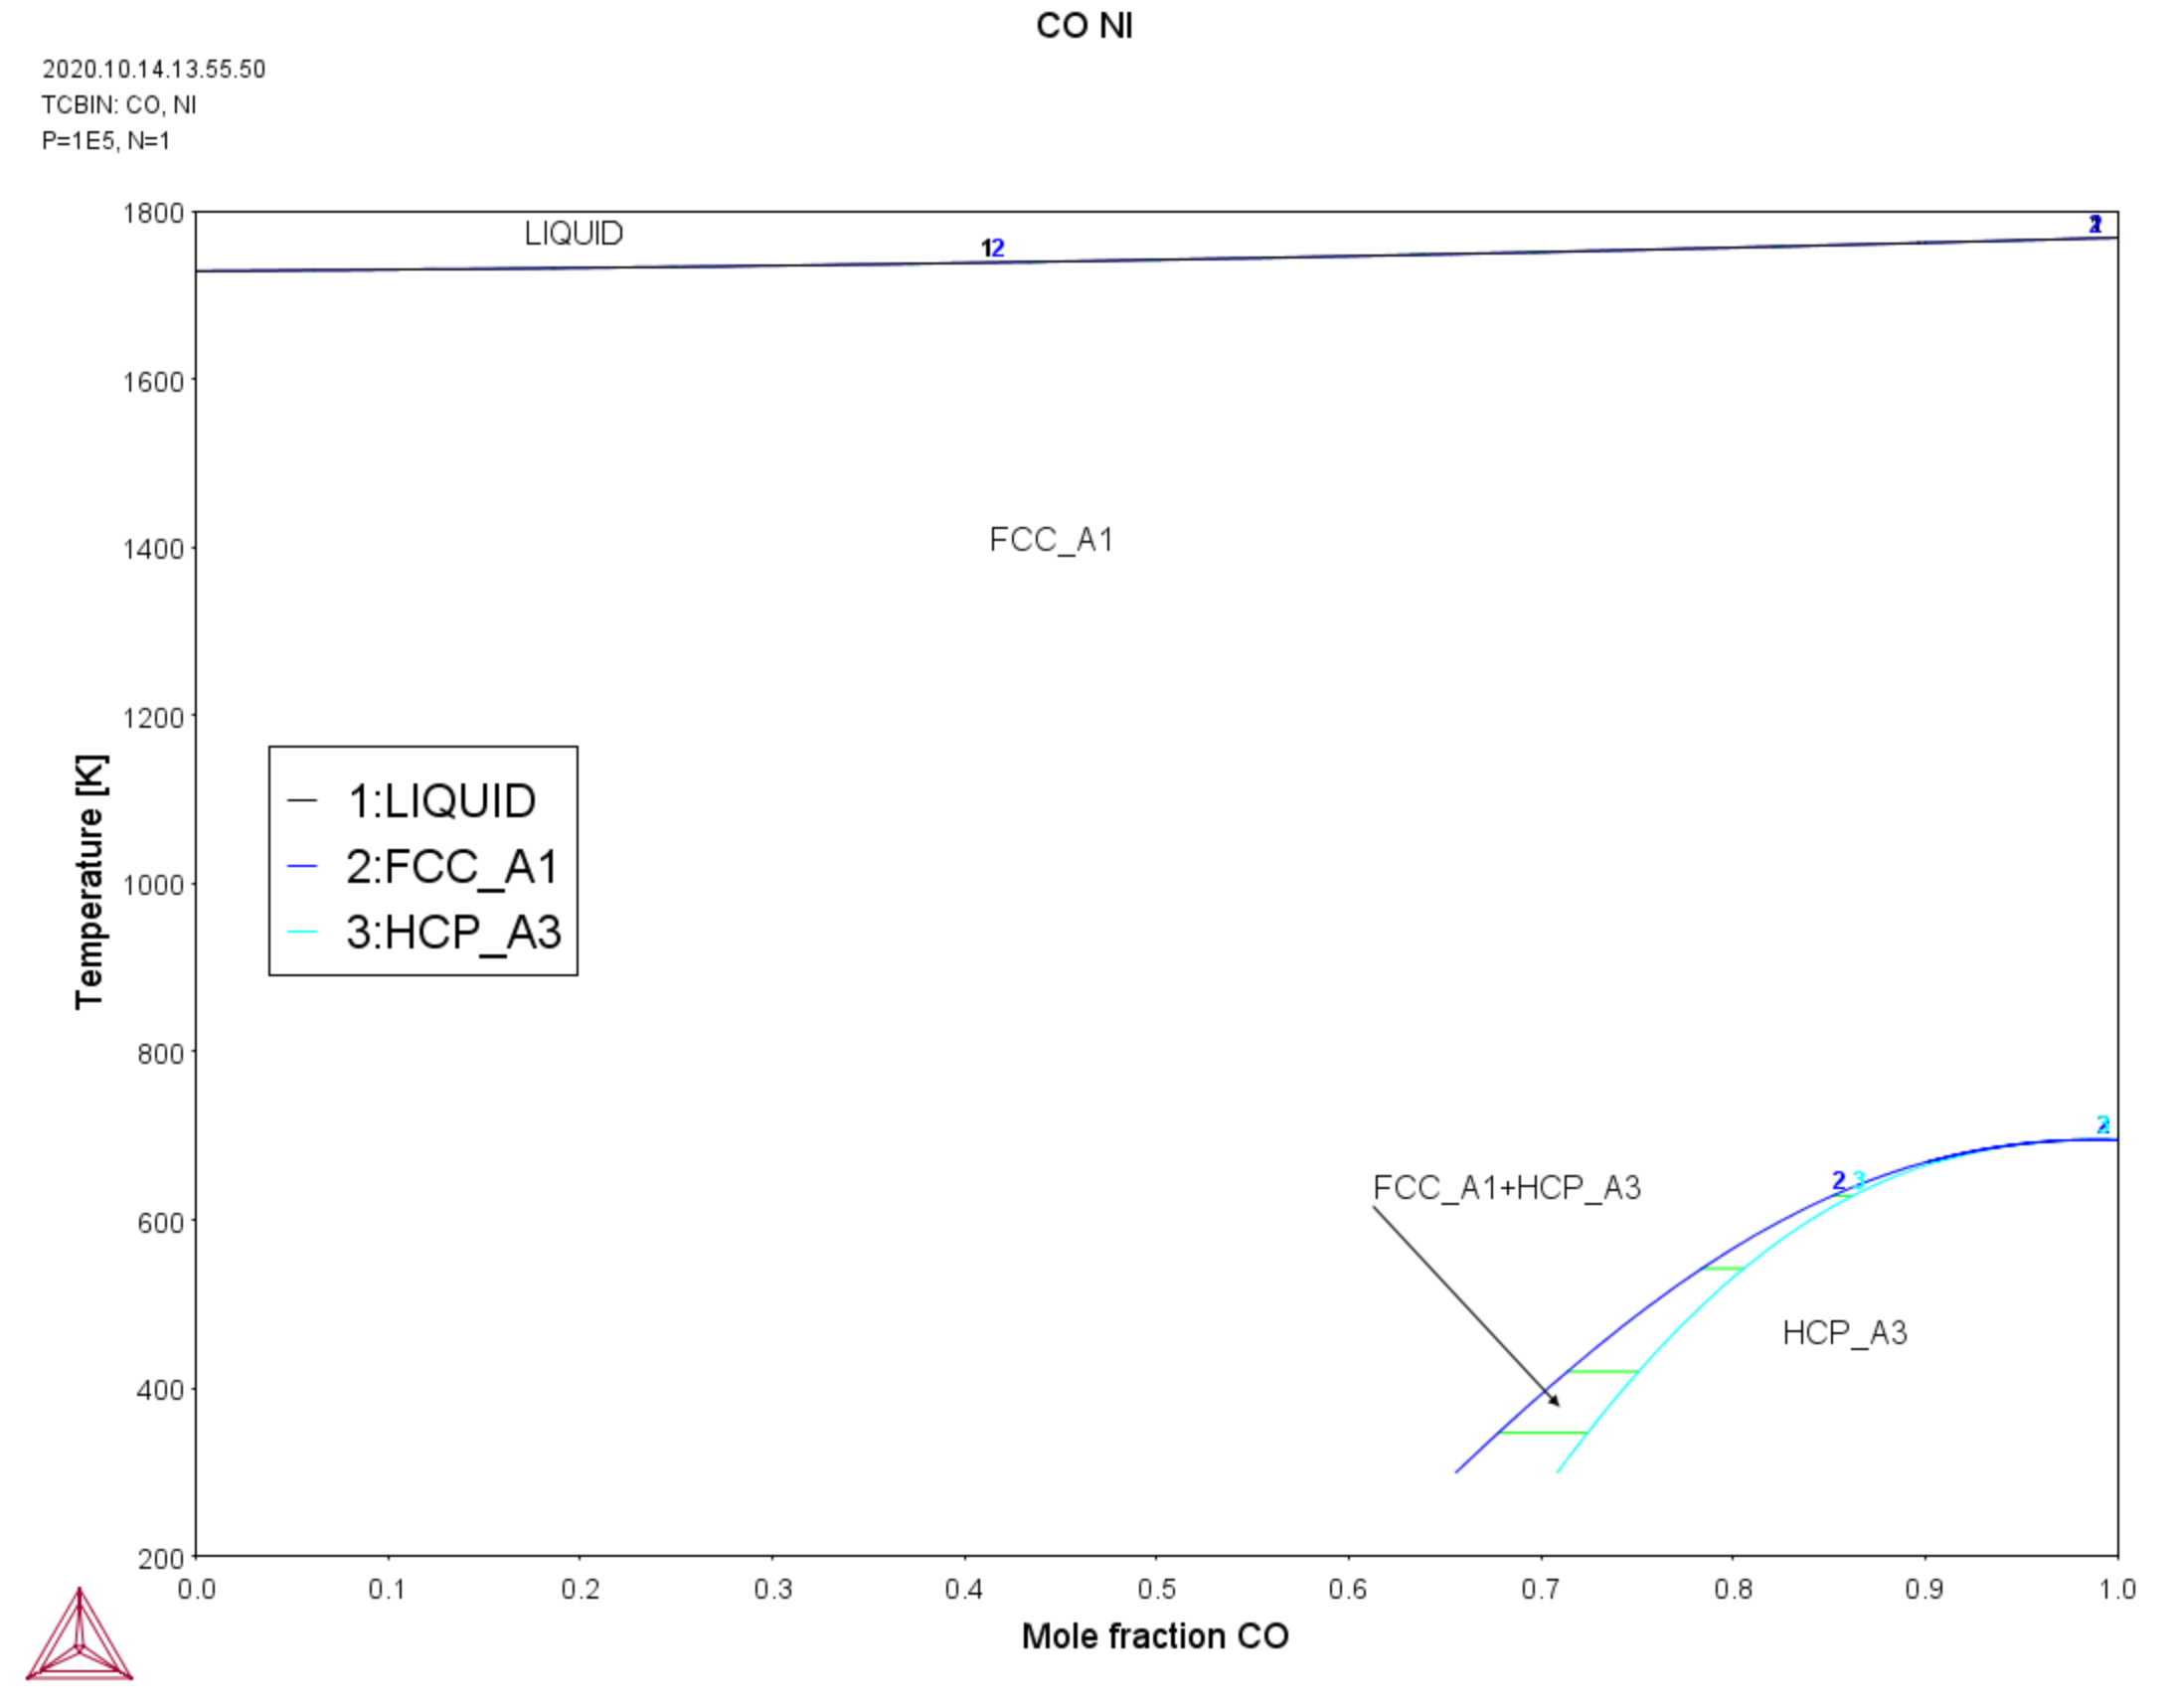

## 2.
Найти область непрерывных твердых растворов на диаграмме. Найти область непрерывных жидких растворов на диаграмме.

<u>Если компоненты системы неограниченно растворимы друг в друге, они образуют непрерывный ряд твердых растворов</u>

## 3.
Выбрать 2 температуры: T1-при которой при любой концентрации будет твердый раствор с одной структурой; T2-при которой при любой концентрации будет жидкость

 - Т1 = 1500
 - Т2 = 1800

In [7]:
T1 = 1500
T2 = 1800

## 4.
Используя функцию equilibrium рассчитать зависимость энтальпии смешения от концентрации для твердого раствора (при температуре T1), затем для жидкости (при температуре T2)

In [8]:
eq_t1 = equilibrium(db, db.elements, 'FCC_A1', conditions={v.P: 101325., v.T: T1, v.X('CO'):(0, 1, 0.05), v.N: 1}, output='HM_MIX')

In [9]:
eq_t2 = equilibrium(db, db.elements, 'LIQUID', conditions={v.P: 101325., v.T: T2, v.X('CO'):(0, 1, 0.05), v.N: 1}, output='HM_MIX')

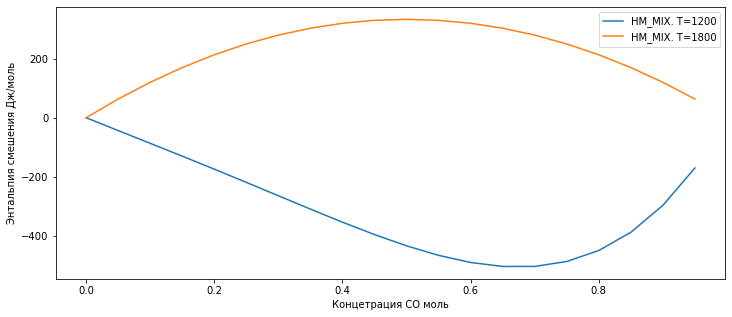

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(np.squeeze(eq_t1.X_CO.data), np.squeeze(eq_t1.HM_MIX.data), label='HM_MIX. T=1500')
plt.plot(np.squeeze(eq_t2.X_CO.data), np.squeeze(eq_t2.HM_MIX.data), label='HM_MIX. T=1800')
plt.legend()
plt.xlabel('Концетрация CO моль')
plt.ylabel('Энтальпия смешения Дж/моль')
plt.show()

Изменил температуру T1 с 1200 на 1500 - график стал более плавный

## 5.
Рассчитать зависимость энтальпии смешения от концентрации для твердого раствора по формуле, приведенной в статье

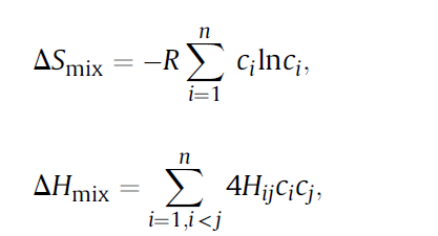

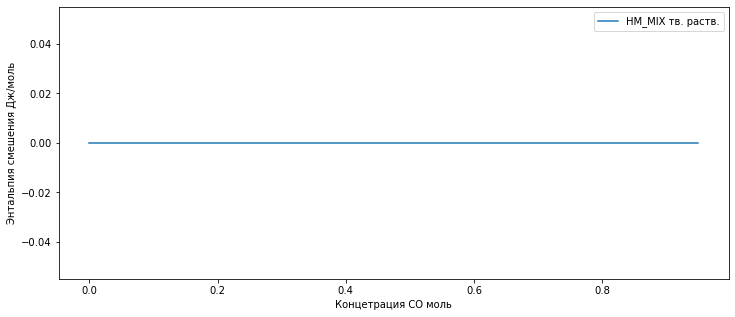

In [11]:
Hij = 0 # Табличное значение Hij для CO-Ni = 0

# Т.к. Hij = 0, то сумма произведений будет также = 0
delta_Hmix = 0

# fix, axes = np.subplots(nrows=2, ncols=1, figsize=(12, 6))
plt.figure(figsize=(12, 5))
X_CO = np.squeeze(eq_t1.X_CO.data)

# X_CO_i = X_CO[:-1]
# X_CO_j = X_CO[1:]
# delta_Hmix = 4*X_CO_i*X_CO_j

plt.plot(X_CO, np.zeros_like(X_CO), label='HM_MIX тв. раств.')
plt.legend()
plt.xlabel('Концетрация CO моль')
plt.ylabel('Энтальпия смешения Дж/моль')
plt.show()

## 6.
Сравнить зависимости энтальпии смешения твердого раствора от концентрации : полученную при помощи расчета через equilibrium  и по формуле, приведенной в статье

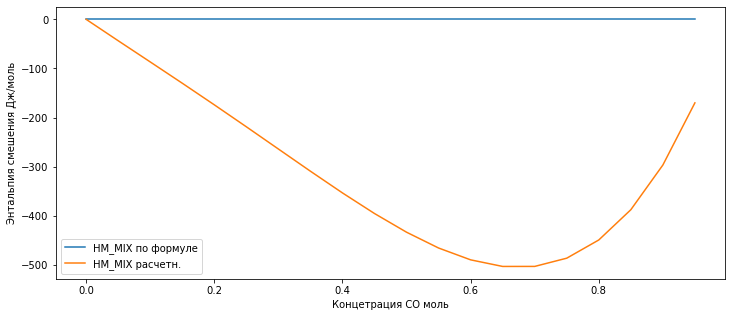

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(X_CO, np.zeros_like(X_CO), label='HM_MIX по формуле')
plt.plot(X_CO, np.squeeze(eq_t1.HM_MIX.data), label='HM_MIX расчетн.')
plt.legend()
plt.xlabel('Концетрация CO моль')
plt.ylabel('Энтальпия смешения Дж/моль')
plt.show()

## 7.
Используя функцию equilibrium рассчитать зависимость энтропии смешения от концентрации для твердого раствора (при температуре T1), затем для жидкости (при температуре T2)

In [14]:
# SM_MIX
eq_entropy_t1 = equilibrium(db, db.elements, 'FCC_A1', conditions={v.P: 101325., v.T: T1, v.X('CO'):(0, 1, 0.05), v.N: 1}, output='SM_MIX')
eq_entropy_t2 = equilibrium(db, db.elements, 'LIQUID', conditions={v.P: 101325., v.T: T2, v.X('CO'):(0, 1, 0.05), v.N: 1}, output='SM_MIX')

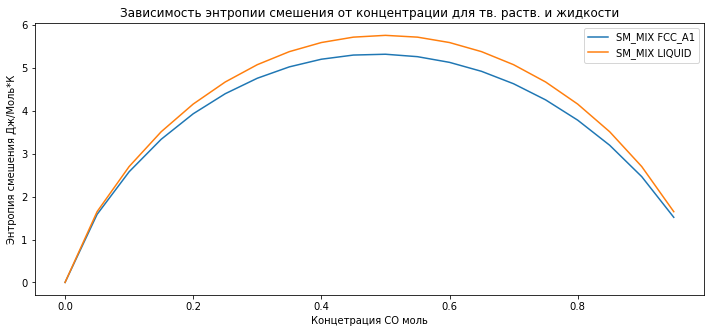

In [15]:
plt.figure(figsize=(12, 5))
plt.title('Зависимость энтропии смешения от концентрации для тв. раств. и жидкости')
plt.plot(X_CO, np.squeeze(eq_entropy_t1.SM_MIX), label='SM_MIX FCC_A1')
plt.plot(X_CO, np.squeeze(eq_entropy_t2.SM_MIX), label='SM_MIX LIQUID')
plt.legend()
plt.xlabel('Концетрация CO моль')
plt.ylabel('Энтропия смешения Дж/Моль*К')
plt.show()

## 8.
Рассчитать зависимость энтропии смешения от концентрации для твердого раствора по формуле, приведенной в статье «Machine-learning phase prediction of high-entropy alloys». 

In [20]:
R = 8.3144598 # Дж / Моль* K
# Для T1
x_concentration1 = np.squeeze(eq_entropy_t1.X_CO.data)
y_concentration1 = 1 - x_concentration1
# Для T2
x_concentration2 = np.squeeze(eq_entropy_t2.X_CO.data)
y_concentration2 = 1 - x_concentration2


delta_Smix_calc1 = -R * (np.log(x_concentration1) * x_concentration1 + np.log(y_concentration1) * y_concentration1)
delta_Smix_calc2 = -R * (np.log(x_concentration2) * x_concentration2 + np.log(y_concentration2) * y_concentration2)

Поменял Log2 на  Log - (ln)

## 9.
Сравнить зависимости энтропии смешения твердого раствора от концентрации : полученную при помощи расчета через equilibrium  и по формуле, приведенной в статье «Machine-learning phase prediction of high-entropy alloys»

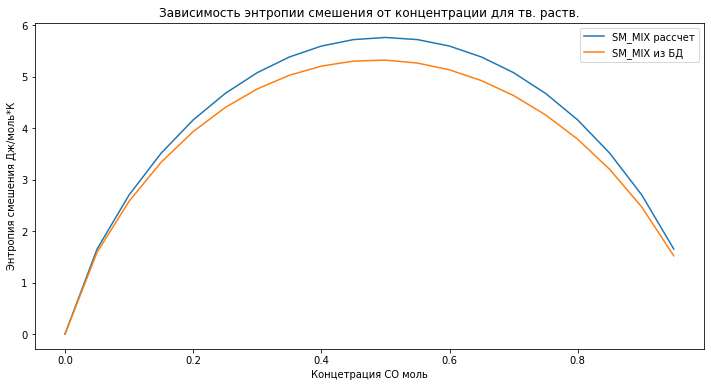

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(x_concentration, delta_Smix_calc1, label='SM_MIX рассчет')
plt.plot(x_concentration, np.squeeze(eq_entropy_t1.SM_MIX), label='SM_MIX из БД')
plt.title('Зависимость энтропии смешения от концентрации для тв. раств.')
plt.xlabel('Концетрация CO моль')
plt.ylabel('Энтропия смешения Дж/моль*К')
plt.legend()
plt.show()

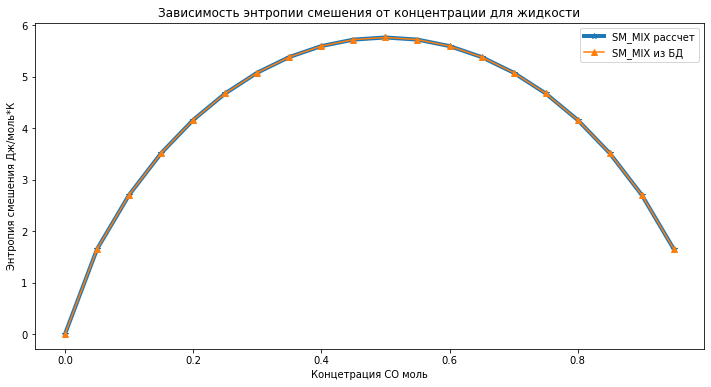

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(x_concentration, delta_Smix_calc2, label='SM_MIX рассчет', marker='*', linewidth=4)
plt.plot(x_concentration, np.squeeze(eq_entropy_t2.SM_MIX), label='SM_MIX из БД', marker='^')
plt.title('Зависимость энтропии смешения от концентрации для жидкости')
plt.xlabel('Концетрация CO моль')
plt.ylabel('Энтропия смешения Дж/моль*К')
plt.legend()
plt.show()